Original rows: 132
Rows after dropna: 0
Percentage remaining: 0.00%


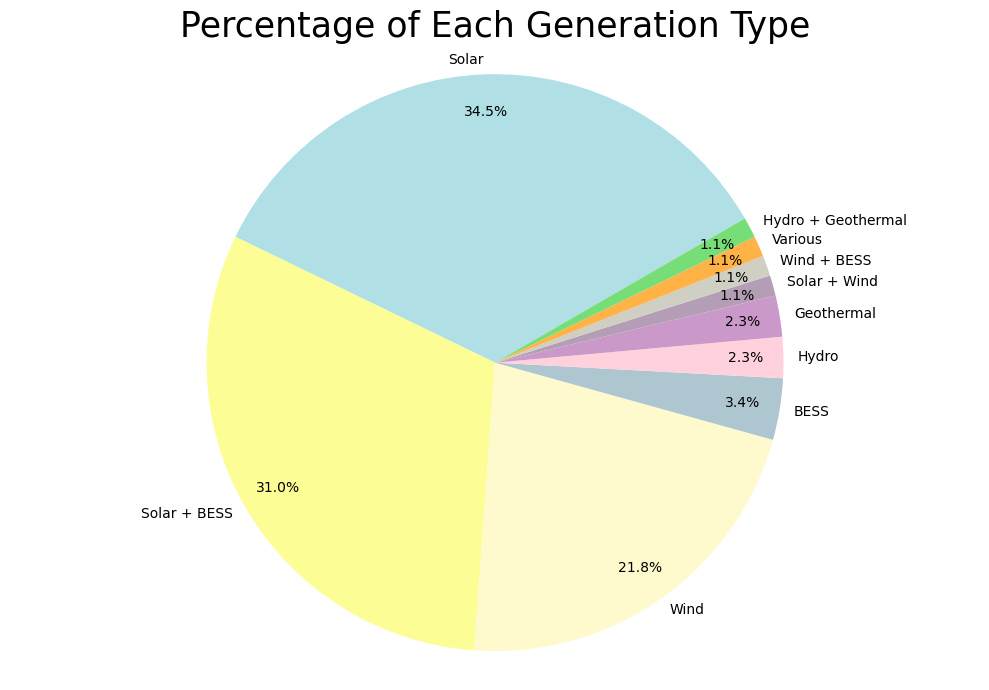

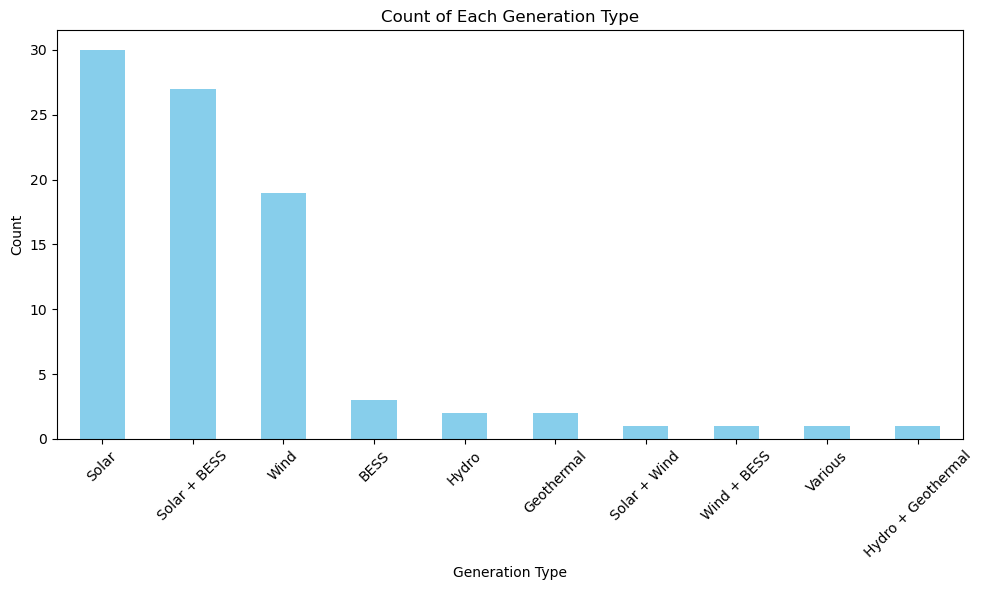

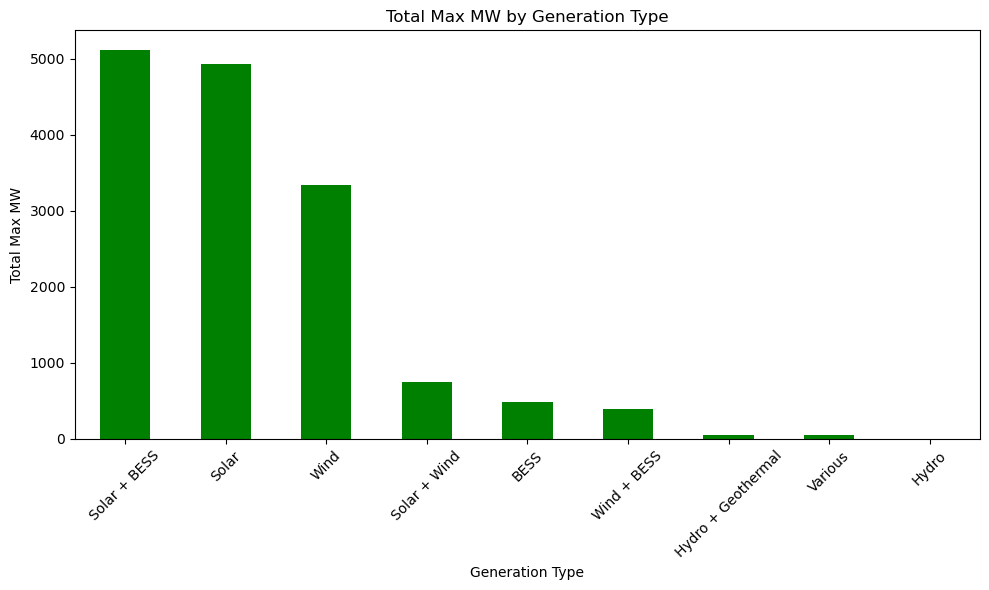

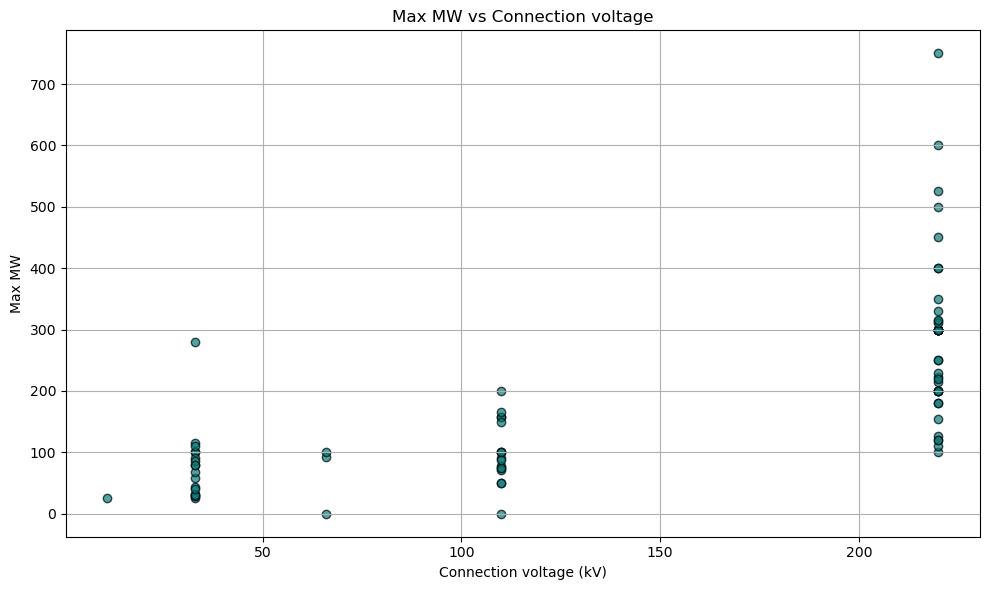

Minimum Connection voltage: 11.0 kV
Maximum Connection voltage: 220.0 kV
Average Connection voltage: 144.27 kV
Total number of records: 85
Number of records by Generation Type:
Generation Type
Solar                 30
Solar + BESS          27
Wind                  19
BESS                   3
Hydro                  2
Solar + Wind           1
Wind + BESS            1
Various                1
Hydro + Geothermal     1
Name: count, dtype: int64
Missing or invalid values in 'Max MW': 0
Missing or invalid values in 'Connection voltage': 7


In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\Jessie Ounei\Documents\Better New Generation Connection Pipeline 2.csv")

original_rows = len(df)

# Drop rows with missing values
df_cleaned = df.dropna()

# Save the new number of rows
cleaned_rows = len(df_cleaned)

# Calculate how much remains
percentage_remaining = (cleaned_rows / original_rows) * 100

# Display the results
print(f"Original rows: {original_rows}")
print(f"Rows after dropna: {cleaned_rows}")
print(f"Percentage remaining: {percentage_remaining:.2f}%")


gen_type_counts = df['Generation Type'].value_counts()


pastel_colors = [
    '#AEC6CF',  # pastel blue
    '#77DD77',  # pastel green
    '#FFB347',  # pastel orange
    '#FFFACD',  # pastel yellow
    '#B39EB5',  # pastel purple
    '#FFD1DC',  # pastel pink
    '#FDFD96',  # pastel lemon
    '#CFCFC4',  # pastel grey
    '#CB99C9',  # pastel violet
    '#B0E0E6',  # pastel turquoise
    ]

random.shuffle(pastel_colors)

plt.figure(figsize=(10,7))
gen_type_counts.plot.pie(autopct='%1.1f%%',colors=pastel_colors,startangle=1110,pctdistance=0.87, labeldistance=1.05,)
plt.title('Percentage of Each Generation Type' , fontsize=25)
plt.axis('equal')
plt.ylabel('')
plt.tight_layout()
plt.show()

generation_counts = df['Generation Type'].value_counts()

generation_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Count of Each Generation Type")
plt.xlabel("Generation Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['Max MW'] = pd.to_numeric(df['Max MW'], errors='coerce')
df = df.dropna(subset=['Max MW'])

total_mw = df.groupby('Generation Type')['Max MW'].sum()
total_mw = total_mw.sort_values(ascending=False)
total_mw.plot(kind='bar', figsize=(10, 6), color='green')
plt.title("Total Max MW by Generation Type")
plt.xlabel("Generation Type")
plt.ylabel("Total Max MW")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['Connection voltage'] = pd.to_numeric(df['Connection voltage'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.scatter(df['Connection voltage'], df['Max MW'], alpha=0.7, color='teal', edgecolors='black')

plt.title("Max MW vs Connection voltage")
plt.xlabel("Connection voltage (kV)")
plt.ylabel("Max MW")
plt.grid(True)
plt.tight_layout()
plt.show()

min_voltage = df['Connection voltage'].min()
max_voltage = df['Connection voltage'].max()
avg_voltage = df['Connection voltage'].mean()

print("Minimum Connection voltage:", min_voltage, "kV")
print("Maximum Connection voltage:", max_voltage, "kV")
print("Average Connection voltage:", round(avg_voltage, 2), "kV")

print("Total number of records:", df.shape[0])
gen_type_counts = df['Generation Type'].value_counts()
print("Number of records by Generation Type:")
print(gen_type_counts)

missing_max_mw = df['Max MW'].isna().sum()
missing_voltage = df['Connection voltage'].isna().sum()

print(f"Missing or invalid values in 'Max MW': {missing_max_mw}")
print(f"Missing or invalid values in 'Connection voltage': {missing_voltage}")